# Exploratory Data Analysis

In this notebook we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do much at this point. In addition, when we create them, we won't be able to extract many insights because of the nature of text-based features. For this reason, only a shallow analysis will be done at this point.

For the plots we have used `seaborn` and `altair`. `altair` is a package which allows us to plot graphics with a simple grammar as we would do in ggplot2 or Tableau. It also provides easy-to-make interactive plots. For further information please visit the project site: https://altair-viz.github.io/.

To install it, please type this command in the shell:

`! conda install -c conda-forge altair vega_datasets notebook vega`

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
#alt.renderers.enable("notebook")
# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

Loading the dataset:

In [46]:
df_path = "/Users/keerthanareddy/Downloads/Latest-News-Classifier-master/0. Latest News Classifier/01. Dataset Creation/"
df_path2 = df_path + 'News_dataset1.csv'
df = pd.read_csv(df_path2, sep=';')

In [47]:
df.head()

,File_Name,Content,Category,Complete_Filename
0,Neha_Assign_AutonomusCar.txt,"A year ago, Detroit and Silicon Valley had vis...",Baleno,Neha_Assign_AutonomusCar.txt-Baleno
1,Neha_Assign_AutonomusCar2.txt,Artificial intelligence (AI) is used in a wide...,Suziki,Neha_Assign_AutonomusCar2.txt-Suziki


### Number of articles in each category

In [48]:
bars = alt.Chart(df).mark_bar(size=50).encode(
 x=alt.X("Category"),
 y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
 tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
 color='Category'
)
text = bars.mark_text(
 align='center',
 baseline='bottom',
).encode(
 text='count()'
)
(bars + text).interactive().properties(
 height=300,
 width=700,
 title = "Number of articles in each category",
)

alt.LayerChart(...)

### % of articles in each category

In [49]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [50]:
df['News_length'] = df['Content'].str.len()

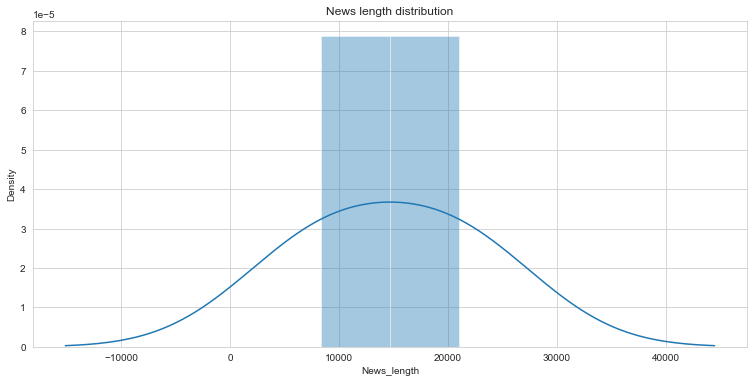

In [30]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['News_length']).set_title('News length distribution');

In [51]:
df['News_length'].describe()

count        2.000000
mean      9434.500000
std       1317.339933
min       8503.000000
25%       8968.750000
50%       9434.500000
75%       9900.250000
max      10366.000000
Name: News_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [52]:
quantile_95 = df['News_length'].quantile(0.95)
df_95 = df[df['News_length'] < quantile_95]

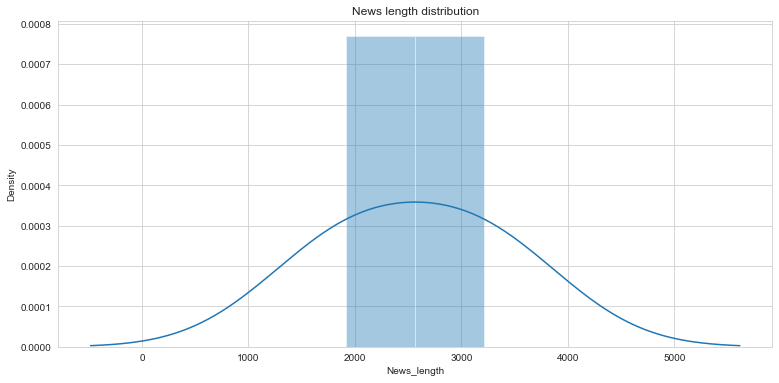

In [18]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['News_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [53]:
df_more10k = df[df['News_length'] > 1000]
len(df_more10k)

2

Let's see one:

In [54]:
df_more10k['Content'].iloc[0]

'A year ago, Detroit and Silicon Valley had visions of putting thousands of self-driving taxis on the road in 2019, ushering in an age of driverless cars.\r\n\r\nMost of those cars have yet to arrive â€” and it is likely to be years before they do. Several carmakers and technology companies have concluded that making autonomous vehicles is going to be harder, slower and costlier than they thought.\r\n\r\nâ€œWe overestimated the arrival of autonomous vehicles,â€\x9d Fordâ€™s chief executive, Jim Hackett, said at the Detroit Economic Club in April.\r\n\r\nIn the most recent sign of the scramble to regroup, Ford and Volkswagen said Friday that they were teaming up to tackle the self-driving challenge.\r\n\r\nThe two automakers plan to use autonomous-vehicle technology from a Pittsburgh start-up, Argo AI, in ride-sharing services in a few urban zones as early as 2021. But Argoâ€™s chief executive, Bryan Salesky, said the industryâ€™s bigger promise of creating driverless cars that could go

It's just a large news article.

Let's now plot a boxplot:

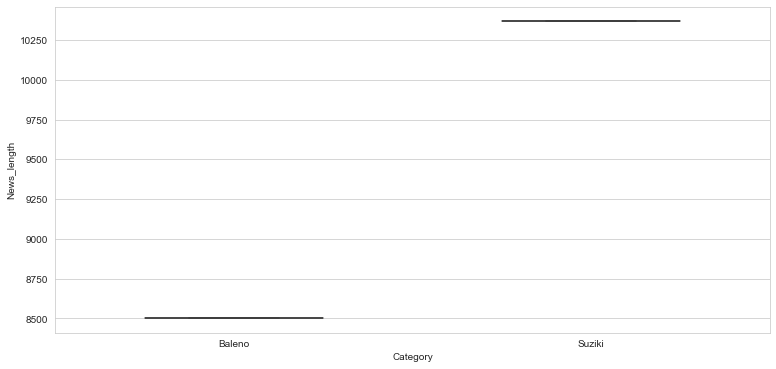

In [55]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='News_length', width=.5);

Now, let's remove the larger documents for better comprehension:

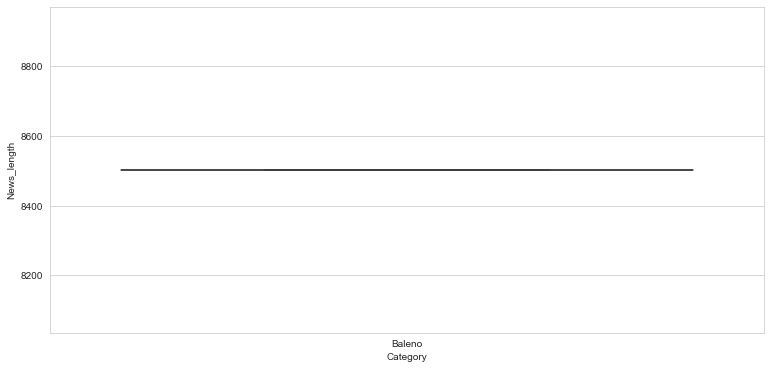

In [56]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='News_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

We'll save the dataset:

In [57]:
with open('News_dataset.pickle16', 'wb') as output:
    pickle.dump(df, output)